#  Submission 4 - Chapter 1
I've demonstrated **clustering level 3**, **evaluate level 3**, **compare level 2 and 3**, and **optimize level 3** in this chapter. 

**Clustering Level 3**
<br>
Apply multiple clustering techniques, and interpret results

**Evaluate Level 3**
<br>
Evaluate a model with multiple metrics and cross validation.
<br><br>
This skill is present in the multiple metrics used to assess the different types of clustering methods, as well as performing cross-validation in the Iris dataset.

**Compare Level 2**
<br>
Compare model classes in specific terms and fit models in terms of traditional model performance metrics.
<br><br>
**Compare Level 3**
<br>
Evaluate tradeoffs between different model comparison types.

**Optimize Level 3**
<br>
Select optimal parameters based of mutiple quantitative criteria and automate parameter tuning.

## Clustering Level 3
I was only missing the descriptions of the clustering techniques to earn this skill in my last check, so I will add descriptions as necessary.

In [137]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.metrics import classification_report,accuracy_score, silhouette_score, adjusted_rand_score, adjusted_mutual_info_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import average_precision_score

In [2]:
# Loading data
wine_data = pd.read_csv("winequality.csv")
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red


In [3]:
wine_data.shape

(6497, 14)

In [4]:
# Exploring classifications: by quality
print(wine_data['quality'].unique())

[5 6 7 4 8 3 9]


In [6]:
# Encoding color as 0=white, 1=red
wine_data["color"] = wine_data.color.apply(lambda x: 1 if x == "red" else 0)
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1,0


In [7]:
# Separating Quality into High/Low
quality = wine_data["quality"].values
temp = []
for num in quality:
    if num<5:
        temp.append("Low")
    else:
        temp.append("High")
temp = pd.DataFrame(data=temp, columns=["ranking"])
data = pd.concat([wine_data,temp],axis=1)
data.drop(columns="quality",axis=1,inplace=True)

In [8]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good,color,ranking
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,1,High
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,1,High
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,1,High
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,1,High
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,1,High


**Method 1: Using KMeans**
<br><br>
*What is K-Means Clustering?*
<br>
* Partitions datasets into K defined subgroups (non-overlapping) called clusters
* Each data point can only belong to one group
* K-Means then assigns data points to a cluster such that the sum of the squared distance between the data points and the cluster’s centroid is at the minimum

*How does K-Means Clustering Work?*
* Specify the number of clusters (K)
* Intialize centroids by selecting K points for the centroids
* Iterate until there is no change in the centroids, i.e. the clusters are not changing anymore

**Source:** 
* https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a

In [9]:
# Separating target from feature variables
X= data.drop(["ranking"], axis = 1)
y=data["ranking"]

In [10]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
cent = kmeans.cluster_centers_

In [11]:
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([0, 0, 0, ..., 1, 0, 0])

In [12]:
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns = list(X.columns.values))

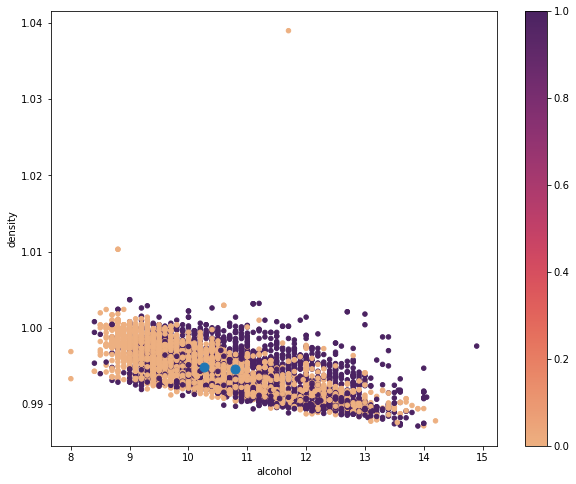

In [143]:
# Plotting relationship between alcohol and density when predicting quality of wine
fig, ax = plt.subplots(1, 1)
X.plot.scatter(x='alcohol', y='density', c= y_kmeans, figsize=(10,8), colormap='flare', ax=ax, mark_right=False)
centroids_df.plot.scatter(x='alcohol', y='density', ax = ax, s = 80, mark_right=False)

In [13]:
# Compiling different metrics
metrics1 = pd.DataFrame({'metric': ["Silhouette","Rand Score","Mutual Info"],
                           'score': [silhouette_score(X, y_kmeans),adjusted_rand_score(y, y_kmeans),adjusted_mutual_info_score(y,y_kmeans)]})
metrics1

,metric,score
0,Silhouette,0.509286
1,Rand Score,0.006000
2,Mutual Info,0.004029


**Method 2: Using Mean Shift**
<br><br>
*What is Mean Shift Clustering?*
<br>
* Mean Shift is formed on the idea of KDE (kernel density estimation) which is a method used to estimate the underlying distribution of the data.
* A kernel/weighting function is placed on each point in the dataset, and then updates the centroids of the dataset based on the processing of the data.
* Aims to discover “blobs” in a smooth density of samples. It is a centroid-based algorithm, which works by updating candidates for centroids to be the mean of the points within a given region. 

*How does Mean Shift Clustering Work?*
*  At every iteration the kernel is shifted to the centroid or the mean of the points within it.
* The method of calculating this mean depends on the choice of the kernel. In this case if a Gaussian kernel is chosen instead of a flat kernel, then every point will first be assigned a weight which will decay exponentially as the distance from the kernel's center increases.
* At convergence, there will be no direction at which a shift can accommodate more points inside the kernel, and iteration most likely will end.

**Sources:** 
<br>
* https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html
* https://www.sciencedirect.com/science/article/pii/S0047259X14002644?via%3Dihub

In [15]:
from sklearn.cluster import MeanShift, estimate_bandwidth
bandwidth = estimate_bandwidth(X)
msc = MeanShift(bandwidth=bandwidth, bin_seeding=True)

In [16]:
msc.fit(X)

MeanShift(bandwidth=42.53479367722483, bin_seeding=True)

In [17]:
labels = msc.labels_
cluster_centers = msc.cluster_centers_

In [18]:
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 6


In [19]:
y_msc = msc.predict(X)
y_msc

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [20]:
centroids_df = pd.DataFrame(cluster_centers, columns = list(X.columns.values))
centroids_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good,color
0,6.877705,0.293597,0.322860,5.279742,0.047030,30.488298,120.296201,0.993541,3.200851,0.495562,10.736210,0.255015,0.074468
1,8.015696,0.464470,0.279312,2.596034,0.075682,14.457016,43.885746,0.995529,3.281098,0.612851,10.664966,0.161952,0.759845
2,6.933333,0.338333,0.256667,3.166667,0.047667,138.666667,297.500000,0.993840,3.316667,0.496667,10.366667,0.000000,0.000000
3,8.850000,0.440000,0.365000,8.625000,0.059500,43.000000,355.250000,0.997950,3.070000,0.665000,10.250000,0.000000,0.000000
4,7.800000,0.965000,0.600000,65.800000,0.074000,8.000000,160.000000,1.038980,3.390000,0.690000,11.700000,0.000000,0.000000


<AxesSubplot:xlabel='alcohol', ylabel='density'>

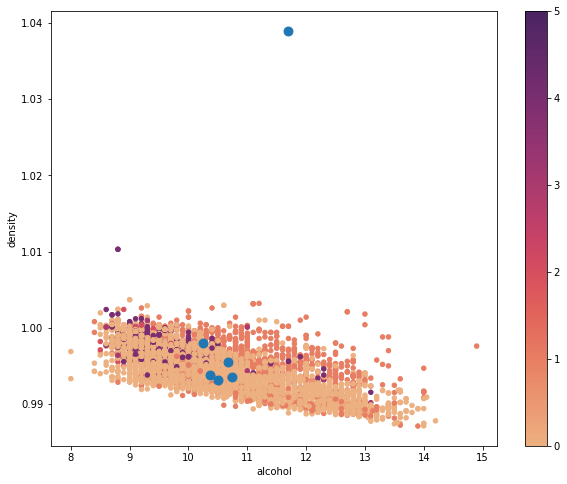

In [21]:
# Plotting relationship between alcohol and density when predicting quality of wine
fig, ax = plt.subplots(1, 1)
X.plot.scatter(x='alcohol', y='density', c= y_msc, figsize=(10,8), colormap='flare', ax=ax, mark_right=False)
centroids_df.plot.scatter(x='alcohol', y='density', ax = ax, s = 80, mark_right=False)

In [22]:
# Compiling different metrics
metrics2 = pd.DataFrame({'metric': ["Silhouette","Rand Score","Mutual Info"],
                           'score': [silhouette_score(X, y_msc),adjusted_rand_score(y, y_msc),adjusted_mutual_info_score(y,y_msc)]})
metrics2

,metric,score
0,Silhouette,0.380816
1,Rand Score,0.021655
2,Mutual Info,0.005514


**Method 3: Agglomerative Clustering**
<br><br>
*What is Agglomerative Clustering?*
<br>
* Partitions datasets into K defined subgroups (non-overlapping) called clusters
* One of the most common types of hierarchial clustering
* Agglomerative clustering works in a “bottom-up” manner. (objects are considered leafs initially, and then are combined into nodes (clusters).

*How does Agglomerative Clustering Work?*
* Starts by treating each object as a singleton cluster.
* Pairs of clusters are successively merged until all clusters have been merged into one big cluster containing all objects.
* The result is a tree-based representation of the objects, named dendrogram.

**Sources**:
* https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
* https://www.datanovia.com/en/lessons/agglomerative-hierarchical-clustering/

In [23]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=5)
ac.fit(X)

AgglomerativeClustering(n_clusters=5)

In [24]:
ac.labels_

array([3, 1, 3, ..., 0, 0, 1], dtype=int64)

In [25]:
y_ac = ac.fit_predict(X)

<AxesSubplot:xlabel='alcohol', ylabel='density'>

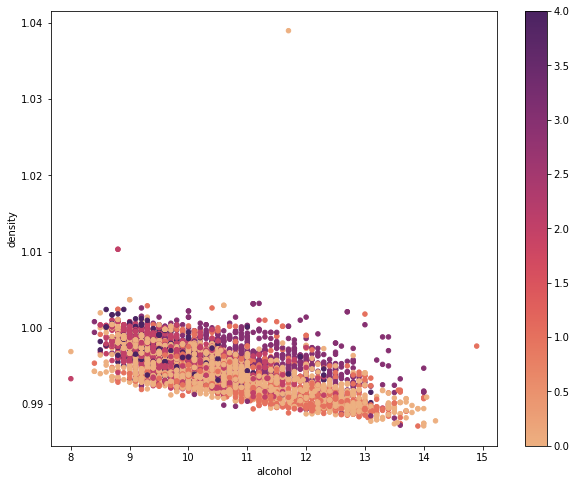

In [26]:
# Plotting relationship between alcohol and density when predicting quality of wine
fig, ax = plt.subplots(1, 1)
X.plot.scatter(x='alcohol', y='density', c= y_ac, figsize=(10,8), colormap='flare', ax=ax, mark_right=False)

In [27]:
# Compiling different metrics
metrics3 = pd.DataFrame({'metric': ["Silhouette","Rand Score","Mutual Info"],
                           'score': [silhouette_score(X, y_ac),adjusted_rand_score(y, y_ac),adjusted_mutual_info_score(y,y_ac)]})
metrics3

,metric,score
0,Silhouette,0.392014
1,Rand Score,0.005780
2,Mutual Info,0.002393


Now, I will compile all of the different accuracies, along with the scoring method used for all of the different kinds of clustering.

In [28]:
# Combining all dataframes
result1 = pd.merge(left = metrics1, right = metrics2, how='inner', on=["metric"])
result = pd.merge(left = result1, right = metrics3, how='inner', on=["metric"])
result.rename(columns={"score_x":"K-means", "score_y":"Mean Shift", "score":"Agglomerative Clustering"})

,metric,K-means,Mean Shift,Agglomerative Clustering
0,Silhouette,0.509286,0.380816,0.392014
1,Rand Score,0.006000,0.021655,0.005780
2,Mutual Info,0.004029,0.005514,0.002393


From the above table, we can see that **K-Means Clustering** had an overall better silhouette score, **Mean Shift** had a better **Mutual Info** score, and **Agg. Clustering** had a better **Rand Score**. 

## Evaluate Level 3

I will now perform some cross-validation for the **Iris Dataset** shown in class, along with using different train and test sizes for the data.

In [29]:
# Loading data
iris_df = pd.read_csv('Iris.csv')

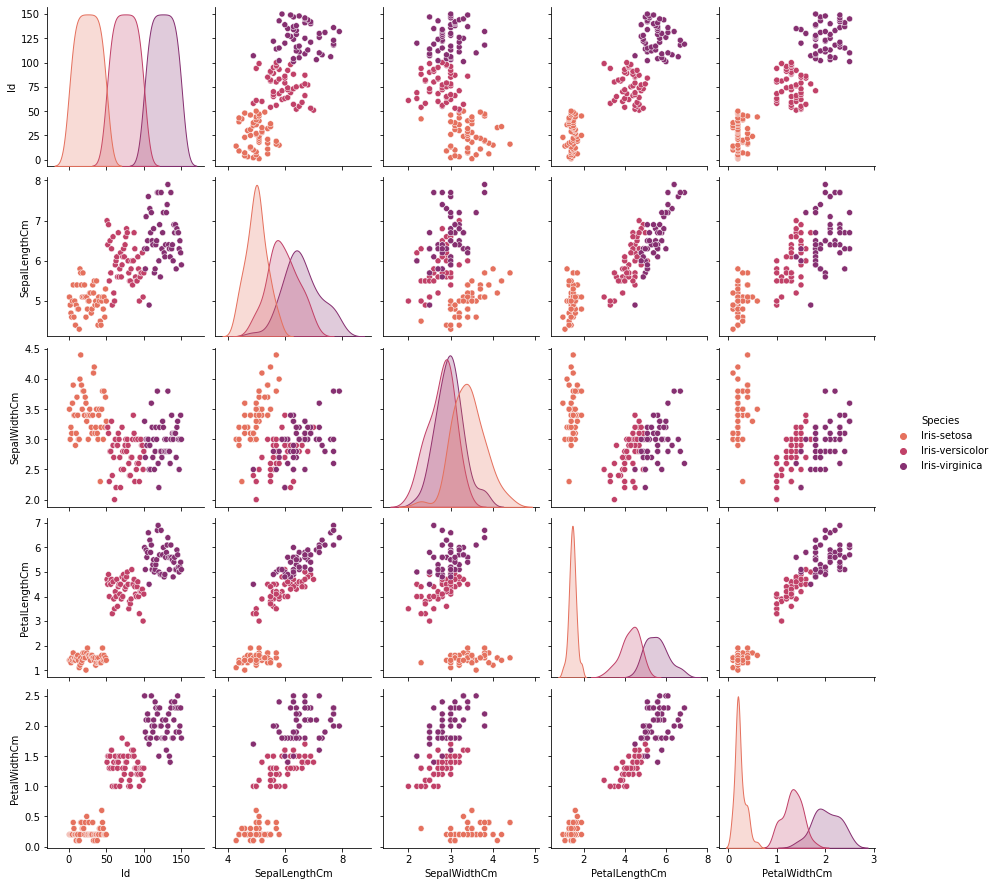

In [30]:
# Brief visualization
sns.pairplot(iris_df, hue='Species', palette="flare")

In [65]:
# Target and feature variables
X = iris_df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
y = iris_df['Species'].values

Now, let's evaluate using **cross validation~** as well as **accuracy scores**, Which I always forget to do, but I am definitely remembering to do this time.

In [95]:
# Using a loop to change test sizes
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
testsize_range = [n/10 for n in range(1,7)]
testsize_scores_dt = []
crossval_scores_dt = []
dt = DecisionTreeClassifier()
for testsize in testsize_range:
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = testsize, random_state=0)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    # See, I remembered this time
    cross_val = cross_val_score(dt, X, y)
    scores = (accuracy_score(y_test, y_pred))
    testsize_scores_dt.append(scores.mean())
    crossval_scores_dt.append(cross_val.mean())

In [96]:
final_results = pd.DataFrame({'test_size': testsize_range,
                           'score': testsize_scores_dt, "cross validation": crossval_scores_dt})
final_results

,test_size,score,cross validation
0,0.1,1.000000,0.966667
1,0.2,1.000000,0.953333
2,0.3,0.977778,0.960000
3,0.4,0.950000,0.966667
4,0.5,0.960000,0.966667
5,0.6,0.966667,0.960000


As we can see, it seems that a **test_size of 0.3 seems to work best for the Iris dataset**. Accurracys of 1 might mean that the dataset is too overfit, or it might be overtrained. The **cross validation score** for test_size 0.3 also fits within the accepted range, so this test size would work perfectly.

Just to make sure I absolutely get **Level 3 for Evaluate**, I will perform KNN on this same dataset and then also perform cross-validation 15 times.

In [74]:
# Using similar loop from before
from sklearn.neighbors import KNeighborsClassifier
k_range = list(range(1,40,2))
crossval_scores_knn = []
acc_scores_knn = []
# Using 15 fold cross validation
for k in k_range:
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)
    # See, I remembered this time
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    # Cross Val score
    cross_val = cross_val_score(knn, X_train, y_train, cv=15)
    crossval_scores_knn.append(cross_val.mean())
    # Accuracy Score
    accuracy_score_knn = knn.score(X_train, y_train)
    acc_scores_knn.append(accuracy_score_knn)

In [75]:
# Compiling into dataframe
cv_results = pd.DataFrame({'k': k_range, "cross validation": crossval_scores_knn,
                          "accuracy": acc_scores_knn})
cv_results

,k,cross validation,accuracy
0,1,0.942857,1.000000
1,3,0.942857,0.961905
2,5,0.952381,0.971429
3,7,0.961905,0.971429
4,9,0.961905,0.961905
5,11,0.961905,0.961905
6,13,0.961905,0.961905
7,15,0.961905,0.961905
8,17,0.961905,0.961905
9,19,0.942857,0.961905


We can see that **K=7** has the best cross validation score **AND** accuracy (CV Score = 0.961905, Acc = 0.971429).


In [138]:
from sklearn.neighbors import KNeighborsClassifier
# Using our optimal test size from earlier, as well as our optimal k
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)
knn2 = KNeighborsClassifier(n_neighbors=7)
knn2.fit(X_train, y_train)
# Predicting values
pred_knn2=knn2.predict(X_test)
print(classification_report(y_test, pred_knn2))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [141]:
# Computing CV again just to show
cross_val = cross_val_score(knn2, X_train, y_train, cv=15)
score_knn_1 = (accuracy_score(y_test, pred_knn2))
print(cross_val)

[1.         1.         1.         0.85714286 1.         1.
 1.         1.         1.         1.         1.         0.71428571
 1.         0.85714286 1.        ]


## Compare Level 2
For this section, I will be comparing the two above models (Decision Trees and KNN, as well as Naive Bayes just for fun), as well as the different metrics used to evaluate them, as well as the trade-offs when applying them.

**Comparing Decision Trees, Naive Bayes, and KNN in Specific Terms**
<br>
Both methods are used for classification, but there are many differences in the two models.

**Naive Bayes**
* Supervised learning.
* Linear classifer (unlike KNN).
* Highly accurate when applied to *big data* or large feature sets.
* More hyperparameters than KNN (alpha and beta).
* Does not suffer from the curse of dimensionality.

**Decision Trees**
* Supervised learning.
* Easiest to explain and understand.
* Over-fitting is a major problem with decision trees.
* Works best for a small number of classes.
* Outperformed by KNN and GNB when it comes to *rare occurences* such as outliers, as decision trees sometime require pruning.

**KNN**
* Unsupervised learning.
* All the features must be numeric.
* Doesn't require training.
* You would want to choose KNN over GNB if there is high conditional independence among predictors.
* Suffers from the curse of dimensionality in some cases (more variables/features leads to sample size growing exponentially).

In The past section involving the **Iris Dataset**, I have used both a Decision Tree Classifer, Naive Bayes Classifer, as well as a KNN Classifer to yield results. 
<br><br>
Previously for the DT Classifer and the KNN Classifer, I assessed the two model's results using the *score method* as well as the *cross_val_score* function. Below I will compile a dataframe with the different metrics from both of these models, as well as getting new metrics for KNN and GNB.

In [97]:
# Comparing accuracy/cross_vcal_score of test size for KNN
# Using a loop to change test sizes (same as bework best for a small number of classesfore, but for knn)
testsize_range = [n/10 for n in range(1,7)]
testsize_scores_knn = []
crossval_scores_knn = []
knn = KNeighborsClassifier()
for testsize in testsize_range:
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = testsize, random_state=0)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    # See, I remembered this time
    cross_val = cross_val_score(knn, X, y)
    scores = (accuracy_score(y_test, y_pred))
    testsize_scores_knn.append(scores.mean())
    crossval_scores_knn.append(cross_val.mean())

In [102]:
# Comparing accuracy/cross_vcal_score of test size for NB
testsize_range = [n/10 for n in range(1,7)]
testsize_scores_gnb = []
crossval_scores_gnb = []
gnb = GaussianNB()
for testsize in testsize_range:
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = testsize, random_state=0)
    gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)
    # See, I remembered this time
    cross_val = cross_val_score(gnb, X, y)
    scores = (accuracy_score(y_test, y_pred))
    testsize_scores_gnb.append(scores.mean())
    crossval_scores_gnb.append(cross_val.mean())

In [103]:
final_results_knn = pd.DataFrame({'test_size': testsize_range,
                           'score': testsize_scores_knn, "cross validation": crossval_scores_knn})
final_results_gnb = pd.DataFrame({'test_size': testsize_range,
                           'score': testsize_scores_gnb, "cross validation": crossval_scores_gnb})

In [106]:
results = pd.merge(left = final_results, right = final_results_knn, on = ["test_size"])
results_final = pd.merge(left = results, right = final_results_gnb, on = ["test_size"])
results_final.rename(columns={"score_x":"Score DT", "score_y":"Score KNN", 
                        "cross validation_x":"Cross Val Score DT",
                        "cross validation_y":"Cross Val Score KNN",
                        "score":"Score GNB", 
                        "cross validation":"Cross Val Score GNB"})

,test_size,Score DT,Cross Val Score DT,Score KNN,Cross Val Score KNN,Score GNB,Cross Val Score GNB
0,0.1,1.000000,0.966667,1.000000,0.973333,0.933333,0.953333
1,0.2,1.000000,0.953333,0.966667,0.973333,0.966667,0.953333
2,0.3,0.977778,0.960000,0.977778,0.973333,1.000000,0.953333
3,0.4,0.950000,0.966667,0.950000,0.973333,0.933333,0.953333
4,0.5,0.960000,0.966667,0.960000,0.973333,0.946667,0.953333
5,0.6,0.966667,0.960000,0.922222,0.973333,0.944444,0.953333


As we can see, our Decision Tree did suffer through some *mild overfitting*, as discovered in the previous section. However, it had better **cross_val_score** than the GNB model with the range of test sizes that it was used on. In terms of consistent model performance, KNN performed very well in terms of **cross_val_score** and **score/accuracy**. This is examined more in the previous sections as well. Unlike for other datasets that I've used in the past, the Naive Bayes model did not perform as well as anticipated. This is probably due to the fact that the Iris dataset is not that large, and is perfect in terms of small classes (3 different types of Irises) for the KNN classifer.

## Compare Level 3

Now I will evaluate the different tradeoffs that can be made by choosing from the models discussed in the previous *Compare* section (Decision Trees, Naive Bayes, KNN).

Overall, each of these models has a decision to make in terms of the **bias variance trade-ff** This tradeoff is simply explained as:
* The model is too simple is often reflected in a biased model with fewer features and more regularization.
* The model is too complex when small changes are made that affect the data tremendously, due to high variance with more features and less regularization.

So what do you choose?
* More complex with less bias and more variance?
* More simple with more bias and less variance?

**Trade-Offs of KNN**
<br>
* There is a definite **bias-variance trade-off** when it comes to KNN classification. This means that if bias is reduced, the variance is increased and vice versa.
<br><br>
* *Bias* is caused by highly correlated predictors, or misinterpretting the relationships between the features and the targets in a dataset.
<br><br>
* *Variance* is caused by fluctuations in the training set. High variance can lead to the model having random noise in the data, and leading thje model to pay a lot of attention to the training data and in turn offer fewer generalizations on data that it has not yet seen.
<br><br>
* Together, bias and variance can lead to the model becoming **over or under - fitted**. How can we solve this?

**Solution for KNN**:
* **Cross Validation**, as we have used previously in this Chapter, can introduce a **validation data set** along with the training and testing sets a model usually has.
* Considering what is important in your model can also help in discovering what is more important in terms of bias and variance. Ideally, low bias and low variance would make for a very well-fitted model, but that can not always occur. This is why introducing a validation set is a good solution.

**Trade-Offs of Decision Trees**
<br>
Similarly to KNN, Decision Trees also face a **bias variance trade-off**. However, solving this problem is a little bit different than KNN. **Decision Trees are also known to have *high variance*, as they create specific branches and splits for samples of the training data, that are specific to this data.**
* In a DT, more roughness = more variance while more smoothness = more bias. When a model gets rougher, it gets more complex. When a model gets smoother, it gets less complex.
* To combat this problem, **pruning the tree** is used to compress the data and to reduce the dimensionality of the model, while still keeping complexity.
* Decreasing the accuracy of the model on the training data increases bias. This lowers variance, meaning your model better generalizes to unseen data (as explained in the KNN section).

**Trade-Offs of Naive Bayes**
<br>
Like other models discussed in this section, Naive Bayes also suffers from **bias variance trade-off**. There are also some solutions to this, such as **tuning hyperparameters alpha and beta**, which I will do in the next section for **Level 3 for Optimize**. Here are the different trade-offs for GNB:
* If alpha = 0 (high variance): our model is overfitted
* If alpha is large (high bias): posterior probabilities are the same

**Other Solutions: Trying different Variations of NB**
There are different types of Naive Bayes classifiers that we can choose from, including:
* Bernoulli NB
* Multinomial NB
* Gaussian NB (which we used above)

**Finally, general solutions for solving these trade-offs:**
<br>
With a model with **high bias:**
* Change the optimization algorithm of the model.
* Perform hyper-parameter tuning on the model.
* Switch the type of model.

With a model with **high variance:**
* Perform regularization using pruning (for DT), dropout (KNN/NB), or Lasso/Ridge Regression for Regression Models.
* Get more data to train on
* Try a different model type

# Optimize Level 3
Going off of the previous section and the criteria for the KNN model, I will now optimize the parameters of our model to insure we have the lowest variance and the lowest bias possible.
<br><br>
To do this, I will optimize the following values:
* n_neighbors, as before
* weights
* p (power parameter)

I optimized these parameters briefly when comparing models in the earlier sections, but I want to agaijn try to optimize them even further.

I will be using a **GridSearch** to perform the tuning of these hyperparameters.

In [111]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
# Default is uniform
weights = ["uniform", "distance"]
# Default 2 (euclidean distance)
p = [1, 2]
# Number of neighbors, default 5, as before (same range)
k_range = list(range(1,40,2))

param_grid = {"n_neighbors": k_range,
              "weights": weights,
              "p": p
              }

grid = GridSearchCV(estimator = KNeighborsClassifier(), 
                    param_grid = param_grid, 
                    cv = 15, # 15, as used previously in the above section
                    scoring = 'accuracy', 
                    refit = True)

knn_model = make_pipeline(StandardScaler(), grid)
knn_model.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_params_)

0.9666666666666667
{'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}


We can see that with this optimization, the nubmer of neighbors for our KNN classifer is optimized at **3**, our p is optimized at **1 (manhattan_distance)**, and our weights are optimized to be **uniform**.

Now, I will fit a model with these optimized paramters and compare it to the un-optimized version.

In [143]:
# Comparing optimized vs. un-optimized KNN model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)
knn3 = KNeighborsClassifier(n_neighbors=3, weights="uniform", p=1)
knn3.fit(X_train, y_train)
# Predicting values
pred_knn3=knn3.predict(X_test)
print(classification_report(y_test, pred_knn3))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [144]:
# Cross-val score and accuracy score for optimized model
# Optimized Model
cross_val_opt = cross_val_score(knn3, X_train, y_train, cv=15).mean()
scores_opt = (accuracy_score(y_test, pred_knn3)).mean()
# Un-optimized Model
cross_val = cross_val.mean()
score_knn_1 = score_knn_1.mean()

In [145]:
# Comparing the two models
compare_results = pd.DataFrame({'Cross_Val_Score': [cross_val, cross_val_opt],
                           'Accuracy': [score_knn_1, scores_opt]})
compare_results

,Cross_Val_Score,Accuracy
0,0.961905,0.977778
1,0.942857,0.977778


We can see that the two models compare very similarly to each other, but this is also because the other model was optmized for test_size while our newly optimized model using GridSearch did not account for test size. I think it would be better to also add that in as well.

**In Evaluate Level 3/Compare Level 2 sections, I automated the tuning of hyperparameters using loops. For this section I wanted to use GridSearch to showcase other ways you could tune these hyperparameters. To consider the automation of these parameters, please look at the aformentioned sections I listed here :)**